In [1]:
import pandas as pd

In [2]:
delivery_time=pd.read_csv("C:\\Users\\chann\\Downloads\\delivery_time (1).csv")

In [4]:
delivery_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
delivery_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\chann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

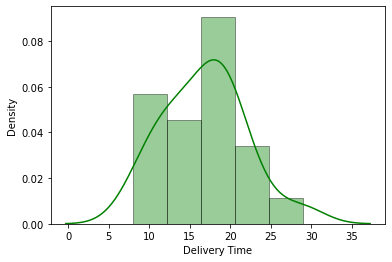

In [9]:
import seaborn as sns
sns.distplot(delivery_time['Delivery Time'],color='g',hist_kws={'edgecolor': 'black'})

C:\Users\chann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

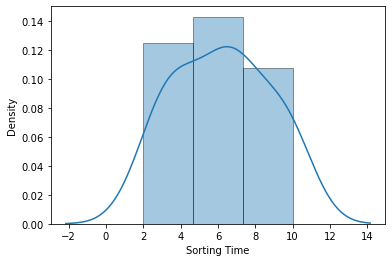

In [11]:
import seaborn as sns
sns.distplot(delivery_time['Sorting Time'],hist_kws={'edgecolor': 'black'})

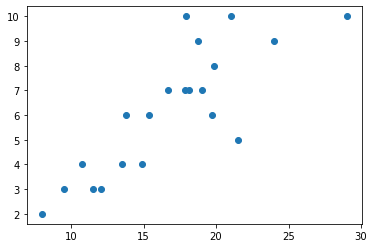

In [14]:
import matplotlib.pyplot as plt
plt.scatter(delivery_time['Delivery Time'], delivery_time['Sorting Time'])

In [15]:
delivery_time.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True)
delivery_time

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery_Time~Sorting_Time",data=delivery_time).fit()

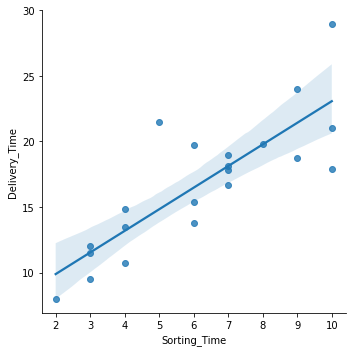

In [17]:
sns.lmplot(x='Sorting_Time',y="Delivery_Time",data=delivery_time)

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

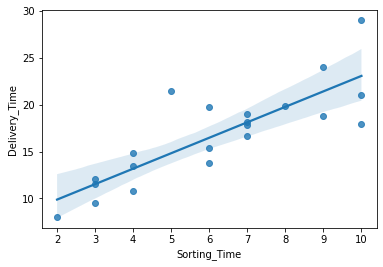

In [18]:
sns.regplot(x='Sorting_Time',y="Delivery_Time",data=delivery_time)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        13:15:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [22]:
model.tvalues

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

In [23]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [24]:
(model.rsquared,model.rsquared_adj)


(0.6822714748417231, 0.6655489208860244)

In [26]:
import numpy as np
RMSE=np.sqrt(((model.resid)**2).mean())
RMSE

2.7916503270617654

# Predicting vaules

In [27]:
delivery_time['Model_Predicted_values']=model.fittedvalues
delivery_time['Error']=model.resid
delivery_time

,Delivery_Time,Sorting_Time,Model_Predicted_values,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


In [28]:
delivery_time['Error_Squared_value']=delivery_time['Error']**2
delivery_time

,Delivery_Time,Sorting_Time,Model_Predicted_values,Error,Error_Squared_value
0,21.00,10,23.072933,-2.072933,4.297051
1,13.50,4,13.178814,0.321186,0.103161
2,19.75,6,16.476853,3.273147,10.713489
3,24.00,9,21.423913,2.576087,6.636224
4,29.00,10,23.072933,5.927067,35.130124
5,15.35,6,16.476853,-1.126853,1.269798
6,19.00,7,18.125873,0.874127,0.764098
7,9.50,3,11.529794,-2.029794,4.120062
8,17.90,10,23.072933,-5.172933,26.759235
9,18.75,9,21.423913,-2.673913,7.149811


In [29]:
import numpy as np
Rmse=np.sqrt(((model.resid)**2).mean())
Rmse

2.7916503270617654

In [30]:
Data=pd.Series([10,14])
Dataprediction=pd.DataFrame(Data,columns=['Sorting_Time'])
Dataprediction
Dataprediction['New_Predicted_DeliveryTime']=model.predict(Dataprediction)

In [31]:
model.predict(Dataprediction)


0    23.072933
1    29.669013
dtype: float64

In [32]:
Dataprediction['New_Predicted_DeliveryTime']=model.predict(Dataprediction)
Dataprediction

,Sorting_Time,New_Predicted_DeliveryTime
0,10,23.072933
1,14,29.669013


We will get more accurate results when we transform the independent variables too. It means skew correction for the independent variables. Lower the skewness better the result.

Transformation is applying a Mathematical Function it to the data.

Few Transformations are:

Log Transformation

Square-Root Transformation

Reciprocal Transformation

Box-Cox Transformation

Yeo-Johnson Transformation (Bonus)

Log Transformations

In [36]:
import numpy as np
log_data= np.log1p(delivery_time)
log_data

,Delivery_Time,Sorting_Time,Model_Predicted_values,Error,Error_Squared_value
0,3.091042,2.397895,3.181088,NaN,1.667150
1,2.674149,1.609438,2.651749,0.278530,0.098179
2,3.032546,1.945910,2.860877,1.452350,2.460741
3,3.218876,2.302585,3.110128,1.274269,2.032903
4,3.401197,2.397895,3.181088,1.935436,3.587127
5,2.794228,1.945910,2.860877,NaN,0.819691
6,2.995732,2.079442,2.951042,0.628143,0.567639
7,2.351375,1.386294,2.528109,NaN,1.633167
8,2.939162,2.397895,3.181088,NaN,3.323569
9,2.983153,2.302585,3.110128,NaN,2.097995


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

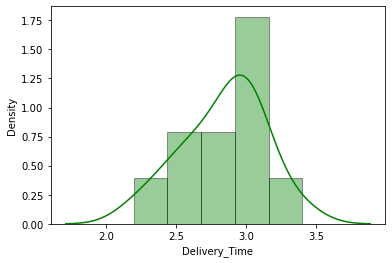

In [43]:
import seaborn as sns
sns.distplot(log_data['Delivery_Time'], color='g', hist_kws={'edgecolor': 'black'})

C:\Users\chann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

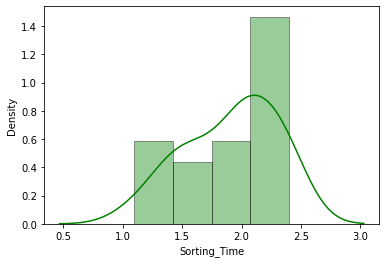

In [47]:
sns.distplot(log_data['Sorting_Time'],color='g', hist_kws={'edgecolor': 'black'})

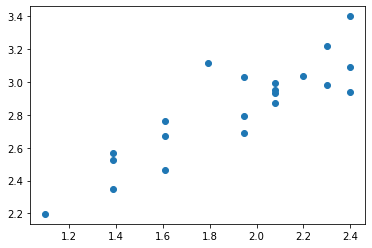

In [50]:
import matplotlib.pyplot as plt
plt.scatter(log_data['Sorting_Time'],log_data['Delivery_Time'])

# From above distribution plot we can understand the skewness has been reduced when we do logarithmic transformations

In [51]:
log_data.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},inplace=True)
log_data.head(5)

,Delivery_Time,Sorting_Time,Model_Predicted_values,Error,Error_Squared_value
0,3.091042,2.397895,3.181088,NaN,1.667150
1,2.674149,1.609438,2.651749,0.278530,0.098179
2,3.032546,1.945910,2.860877,1.452350,2.460741
3,3.218876,2.302585,3.110128,1.274269,2.032903
4,3.401197,2.397895,3.181088,1.935436,3.587127


In [52]:
import statsmodels.formula.api as smf
model_log=smf.ols("Delivery_Time~Sorting_Time",data=log_data).fit()

In [53]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     61.08
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           2.37e-07
Time:                        13:29:32   Log-Likelihood:                 11.264
No. Observations:                  21   AIC:                            -18.53
Df Residuals:                      19   BIC:                            -16.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5561      0.167      9.307      0.000       1.206       1.906
Sorting_Time     0.6725      0.086      7.816      0.000       0.492       0.853
==============================================================================
Omnibus:                        2.074   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.269
Skew:                           0.602   Prob(JB):                        0.530
Kurtosis:                       2.966   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
Rmse_log=np.sqrt(((model_log.resid)**2).mean())
Rmse_log

0.14151895435685305

RSQRD VALUE HAS BEEN IMPROVED AFTER TRANSFORMATION

Square Root Transformations

C:\Users\chann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Sqrt(Delivery Time) and Sqrt(Sorting Time)')

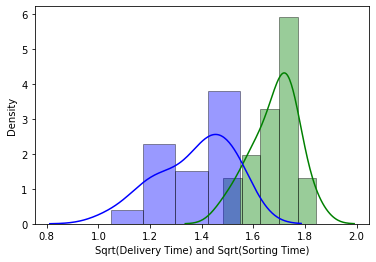

In [58]:
sqrt1 = np.sqrt(log_data['Delivery_Time'])
sqrt2 = np.sqrt(log_data['Sorting_Time'])

sns.distplot(sqrt1, color='g', hist_kws={'edgecolor': 'black'})
sns.distplot(sqrt2, color='b', hist_kws={'edgecolor': 'black'})
plt.xlabel('Sqrt(Delivery Time) and Sqrt(Sorting Time)')


In [59]:
model_sqrt=smf.ols("sqrt1~sqrt2",data=log_data).fit()
RMSE_SQRT=np.sqrt(((model_sqrt.resid)**2).mean())
RMSE_SQRT

0.041115197066039035

Square Transformation

In [61]:
sqr1=(log_data['Delivery_Time']**2, hist_kws={'edgecolor': 'black'})
sqr2=(log_data['Sorting_Time']**2, hist_kws={'edgecolor': 'black'})
sns.distplot(sqrt1);

SyntaxError: invalid syntax (Temp/ipykernel_7200/397118327.py, line 1)

C:\Users\chann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Squared Delivery Time and Squared Sorting Time')

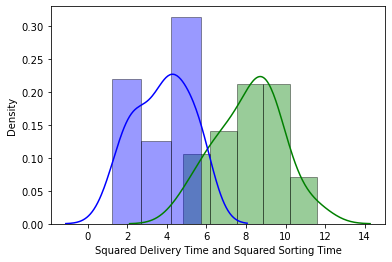

In [62]:
sns.distplot(log_data['Delivery_Time']**2, color='g', hist_kws={'edgecolor': 'black'})
sns.distplot(log_data['Sorting_Time']**2, color='b', hist_kws={'edgecolor': 'black'})
plt.xlabel('Squared Delivery Time and Squared Sorting Time')

In [63]:
model_sqr=smf.ols('sqr1~sqr2',data=log_data).fit()
RMSE_SQR=np.sqrt(((model_sqr.resid)**2).mean())
RMSE_SQR

0.8453411353194171